<a href="https://colab.research.google.com/github/wolfMatheus/KNN-e-MLP/blob/main/Trabalho_de_IA_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr style="height:10px"> 
 
<div class='container2'>
	<h1>Trabalho acadêmico: Aprendizagem de Máquina - Classificação de Vinhos - CSI457</h1>
    <h2>UFOP - DECSI</h2>
</div>
Aluno:<a href="https://github.com/wolfMatheus/" > Matheus Fernandes Gomes</a> <br> Matricula: 17.2.5941.</br> Professor: Talles Medeiros
<hr style="height:5px"> 
    
<h2>Análise e Preparação dos Dados</h2>




## Introdução

Esse trabalho visa apresentar uma análise estatística, o pré-processamento e, por fim, realizar a tarefa preditiva de classificação usando os algoritmos KNN (K-nearest neighbors, ou “K-vizinhos mais próximos”) e MLP (MultiLayer Perceptron). Ondem serão realizadas tarefas de análise e pré-processamento durante a execução do algoritimo.  A base de dados Wine.csv deverá ser importada para a execução desse algoritimo, ela possui 13 atributos descritivos e 1 atributo meta (3 classes) O algoritmo será treinado com 70% dos dados e 30% foram destinados para teste. O hyperparâmetro K do KNN foi otimizado para obter o melhor K neste problema. A rede MLP também será otimizada para obter o melhor desempenho preditivo. Os resultados serão exibidos junto a uma acurácia sobre o conjunto de teste, Tambem será apresentada a matriz de confusáo para este mesmo conjunto.

---
## Recursos Necessários

Para este *notebook*, deve ser utilizado o `Python 3.5` ou superior com as seguintes bibliotecas externas, que deverão ser instaladas:

* [`matplotlib`](https://matplotlib.org/) (versão 3.1.3 ou superior): construção e exibição de gráficos variados
* [`seaborn`](https://seaborn.pydata.org/) (versão 0.10.0 ou superior): construção e exibição de gráficos variados.
* [`numpy`](https://numpy.org) (versão 1.16.2 ou superior): manipulação de dados em formato de vetores e matrizes.
* [`pandas`](https://pandas.pydata.org/pandas-docs/stable/index.html) (versão 0.24.1 ou superior): manipulação de dados em formato de tabelas.
* [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)(versão 0.24.1 ou superior): Transforme recursos dimensionando cada recurso para um determinado intervalo.
* [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) (versão 0.24.1 ou superior): Pipeline de transformações com um estimador final.
* [`metrics`](https://scikit-learn.org/stable/modules/model_evaluation.html) (versão 0.24.1 ou superior): Verifica as metricas das variaveis
* [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) (versão 0.24.1 ou superior): Calcular a matriz de confusão para avaliar a precisão de uma classificação.
* [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) (versão 0.24.1 ou superior): Padronize recursos removendo a média e dimensionando para a variação da unidade.
* [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) (versão 0.24.1 ou superior): Classificador implementando o voto dos k-vizinhos mais próximos.
* [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) (versão 0.24.1 ou superior): Divida matrizes ou matrizes em subconjuntos aleatórios de treinamento e teste
* [`ListedColormap`](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.ListedColormap.html) (versão 0.24.1 ou superior): Objeto de mapa de cores gerado a partir de uma lista de cores.
* [`matplotlib.pyplot`](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) (versão 0.24.1 ou superior): É uma interface baseada em estado para matplotlib
* [`sklearn`](https://scikit-learn.org/stable/) (versão 0.24.1 ou superior): Aprendizado de máquina de código aberto


Será utilizado também o conjuntos de dados disponibilizado junto com este *notebook*, que se encontra no diretório `datasets`, em formato de arquivo `.csv`.

---
## Carregando os dados

Primeiro, foram importadas todas as bibliotecas que serão usadas ao longo deste notebook.

In [1]:
# -*- coding: utf-8 -*-

import numpy as np # importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd # importa a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados

# bibliotecas usadas para geracao de graficos
import seaborn as sns
import matplotlib.pyplot as plt

print('Bibliotecas carregadas com sucesso')
#Importando bibliotecas para o KNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, plot_roc_curve
print('Bibliotecas KNN carregadas com sucesso')

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
print('Bibliotecas MLP carregadas com sucesso')



Bibliotecas carregadas com sucesso
Bibliotecas KNN carregadas com sucesso
Bibliotecas MLP carregadas com sucesso


Em seguida, os dados serão carregados do arquivo wine.csv e serão atribuidos nomes aos seus atributos. 


In [2]:
# importa o arquivo e guarda em um dataframe do Pandas    sep=',', index_col=None
df_dataset = pd.read_csv( 'wine.csv', header=None) 
df_dataset.head(2)
df_dataset.columns = [  'Alcohol'
             	,'MalicAcid'
             	,'Ash'
            	,'Alcalinity of ash'
             	,'Magnesium'
            	,'Total Phenols'
             	,'Flavanoids'
             	,'NonFlavanoid Phenols'
             	,'Proanthocyanins'
            	,'Color Intensity'
             	,'Hue'
             	,'OD280_OD315'
             	,'Proline'
              ,'Name'
                ]

df_dataset.head(2)
print('Dados importados com sucesso!')

Dados importados com sucesso!


Agora, vamos dar uma olhada nas 100 primeiras amostras da base de dados.

> Bloco com recuo



In [3]:
# exibe o dataframe
display(df_dataset.head(n=100))

Alcohol  MalicAcid   Ash  Alcalinity of ash  Magnesium  Total Phenols  \
0     14.23       1.71  2.43               15.6        127           2.80   
1     13.20       1.78  2.14               11.2        100           2.65   
2     13.16       2.36  2.67               18.6        101           2.80   
3     14.37       1.95  2.50               16.8        113           3.85   
4     13.24       2.59  2.87               21.0        118           2.80   
..      ...        ...   ...                ...        ...            ...   
95    12.47       1.52  2.20               19.0        162           2.50   
96    11.81       2.12  2.74               21.5        134           1.60   
97    12.29       1.41  1.98               16.0         85           2.55   
98    12.37       1.07  2.10               18.5         88           3.52   
99    12.29       3.17  2.21               18.0         88           2.85   

    Flavanoids  NonFlavanoid Phenols  Proanthocyanins  Color Intensity   Hue  \
0         3.06                  0.28             2.29             5.64  1.04   
1         2.76                  0.26             1.28             4.38  1.05   
2         3.24                  0.30             2.81             5.68  1.03   
3         3.49                  0.24             2.18             7.80  0.86   
4         2.69                  0.39             1.82             4.32  1.04   
..         ...                   ...              ...              ...   ...   
95        2.27                  0.32             3.28             2.60  1.16   
96        0.99                  0.14             1.56             2.50  0.95   
97        2.50                  0.29             1.77             2.90  1.23   
98        3.75                  0.24             1.95             4.50  1.04   
99        2.99                  0.45             2.81             2.30  1.42   

    OD280_OD315  Proline  Name  
0          3.92     1065     1  
1          3.40     1050     1  
2          3.17     1185     1  
3          3.45     1480     1  
4          2.93      735     1  
..          ...      ...   ...  
95         2.63      937     2  
96         2.26      625     2  
97         2.74      428     2  
98         2.77      660     2  
99         2.83      406     2  

[100 rows x 14 columns]

A base de dados contém amostras de vinhos (linhas) representadas pelos seguintes atributos (colunas): `Alcohol`, `MalicAcid`,	`Ash`,	`Alcalinity of ash`,	`Magnesium`,	`Total Phenols`,	`Flavanoids`,	`NonFlavanoid Phenols`,	`Proanthocyanins`,	`Color Intensity`,	`Hue`,	`OD280_OD315`,	`Proline`. Por fim, temos o atributo `Name` que contém cada tipo de vinho.

O atributo `Name` é qualitativo, uma vez que é usado para identificar uma determinada amostra. Ele possui valores numéricos entre 1 a 3 e exerce apenas a função de identificação. 
O atributo `Name` é qualitativo nominal e representa tipos de vinhos. Portanto, o problema em questão é de <b>aprendizado supervisionado</b> $\rightarrow$ <b>classificação</b>.

## Pré-processamento: eliminação de atributos irrelevantes

O objetivo do problema é identificar diferentes tipos de vinhos (`Name`), dados os demais atributos. Assim, não foram removidos nenhuma coluna do banco de dados. 

In [4]:
# remove as colunas id_planta e cidade_origem
#df_dataset = df_dataset.drop(columns=['Name'])

# imprime o dataframe
display(df_dataset.head(n=100))

Alcohol  MalicAcid   Ash  Alcalinity of ash  Magnesium  Total Phenols  \
0     14.23       1.71  2.43               15.6        127           2.80   
1     13.20       1.78  2.14               11.2        100           2.65   
2     13.16       2.36  2.67               18.6        101           2.80   
3     14.37       1.95  2.50               16.8        113           3.85   
4     13.24       2.59  2.87               21.0        118           2.80   
..      ...        ...   ...                ...        ...            ...   
95    12.47       1.52  2.20               19.0        162           2.50   
96    11.81       2.12  2.74               21.5        134           1.60   
97    12.29       1.41  1.98               16.0         85           2.55   
98    12.37       1.07  2.10               18.5         88           3.52   
99    12.29       3.17  2.21               18.0         88           2.85   

    Flavanoids  NonFlavanoid Phenols  Proanthocyanins  Color Intensity   Hue  \
0         3.06                  0.28             2.29             5.64  1.04   
1         2.76                  0.26             1.28             4.38  1.05   
2         3.24                  0.30             2.81             5.68  1.03   
3         3.49                  0.24             2.18             7.80  0.86   
4         2.69                  0.39             1.82             4.32  1.04   
..         ...                   ...              ...              ...   ...   
95        2.27                  0.32             3.28             2.60  1.16   
96        0.99                  0.14             1.56             2.50  0.95   
97        2.50                  0.29             1.77             2.90  1.23   
98        3.75                  0.24             1.95             4.50  1.04   
99        2.99                  0.45             2.81             2.30  1.42   

    OD280_OD315  Proline  Name  
0          3.92     1065     1  
1          3.40     1050     1  
2          3.17     1185     1  
3          3.45     1480     1  
4          2.93      735     1  
..          ...      ...   ...  
95         2.63      937     2  
96         2.26      625     2  
97         2.74      428     2  
98         2.77      660     2  
99         2.83      406     2  

[100 rows x 14 columns]

## Pré-processamento: tratamento de atributos com valores ausentes

Outro passo importante, é verificar se existem atributos com valores ausentes (*NaN*) na base de dados.

In [5]:
# índices das linhas que contém valores NaN
idxRowNan = pd.isnull(df_dataset).any(1).to_numpy().nonzero()

# imprime apenas as linhas com valoes ausentes
display(df_dataset.iloc[idxRowNan])

Empty DataFrame
Columns: [Alcohol, MalicAcid, Ash, Alcalinity of ash, Magnesium, Total Phenols, Flavanoids, NonFlavanoid Phenols, Proanthocyanins, Color Intensity, Hue, OD280_OD315, Proline, Name]
Index: []

Como podemos ver, não existe o atributo com valores ausentes no banco de dados.  

Existem diversas técnicas para tratar atributos faltantes. Como este problema não possui valores ausentes, seu codigo foi comentado. Mas uma das tecnicas conhecidas seria a de preencher esses valores com a média dos valores conhecidos da respectiva classe.

In [6]:
"""def trataFaltantes( df_dataset ):
    '''
    Substitui os valores faltantes pela média dos outros valores do mesmo atributo
    de amostras que sejam da mesma classe    
    '''
    
    # seleciona apenas as linhas da base de dados onde a coluna largura_sepala não contém valores nulos
    notNull_ls = df_dataset.loc[ ~pd.isnull(df_dataset['largura_sepala']), :]
    notNull_cp = df_dataset.loc[ ~pd.isnull(df_dataset['comprimento_petala']), :]

    # calcula a media dos valores do atributo largura_sepala que não são nulos e que são da classe Iris-setosa 
    media_ls = notNull_ls[ notNull_ls['classe']=='Iris-setosa' ]['largura_sepala'].mean()
    media_cp = notNull_cp[ notNull_cp['classe']=='Iris-setosa' ]['comprimento_petala'].mean()

    # substitui os valores nulos pela média 
    df_dataset.loc[ pd.isnull(df_dataset['largura_sepala']), 'largura_sepala'] = media_ls
    df_dataset.loc[ pd.isnull(df_dataset['comprimento_petala']), 'comprimento_petala'] = media_cp
    
    return df_dataset

trataFaltantes( df_dataset )
    
# imprime apenas as linhas que antes possuiam valores NaN
print('\nAmostras que possuiam valores faltantes:')
display(df_dataset.iloc[idxRowNan])"""

"def trataFaltantes( df_dataset ):\n    '''\n    Substitui os valores faltantes pela média dos outros valores do mesmo atributo\n    de amostras que sejam da mesma classe    \n    '''\n    \n    # seleciona apenas as linhas da base de dados onde a coluna largura_sepala não contém valores nulos\n    notNull_ls = df_dataset.loc[ ~pd.isnull(df_dataset['largura_sepala']), :]\n    notNull_cp = df_dataset.loc[ ~pd.isnull(df_dataset['comprimento_petala']), :]\n\n    # calcula a media dos valores do atributo largura_sepala que não são nulos e que são da classe Iris-setosa \n    media_ls = notNull_ls[ notNull_ls['classe']=='Iris-setosa' ]['largura_sepala'].mean()\n    media_cp = notNull_cp[ notNull_cp['classe']=='Iris-setosa' ]['comprimento_petala'].mean()\n\n    # substitui os valores nulos pela média \n    df_dataset.loc[ pd.isnull(df_dataset['largura_sepala']), 'largura_sepala'] = media_ls\n    df_dataset.loc[ pd.isnull(df_dataset['comprimento_petala']), 'comprimento_petala'] = media_cp\n   

## Pré-processamento: tratamento de dados inconsistentes ou redundantes

Outro passo importante, é verificar se existem dados inconsistentes ou redundantes. A forma mais comum de inconsistência é quando há amostras representadas por atributos com todos os valores iguais, mas com classes diferentes. A redundância é dada pela repetição de linhas na base de dados.

A seguir, vamos verificar se existem amostras duplicadas (redundantes) e inconsistentes.

In [7]:
df_duplicates = df_dataset[ df_dataset.duplicated(subset=['Alcohol','MalicAcid','Ash','Alcalinity of ash','Magnesium','Total Phenols','Flavanoids','NonFlavanoid Phenols','Proanthocyanins','Color Intensity','Hue','OD280_OD315','Proline'],keep=False)]
# se houver valores redundantes ou inconsistentes, imprima 
if len(df_duplicates)>0:
    print('\nAmostras redundantes ou inconsistentes:')
    display(df_duplicates)
else:
    print('Não existem valores duplicados')

Não existem valores duplicados


Como retornado pela função, não existe amostras redundantes (duplicadas) e  inconsistentes (amostras iguais, mas com classes distintas). 

Caso existissem, seriam removidas as amostras redundantes.

In [8]:
def delDuplicatas( df_dataset ):
    '''
    Para cada grupo de amostras duplicadas, mantém uma e apaga as demais
    '''
    
    # remove as amostras duplicadas, mantendo apenas a primeira ocorrencia
    df_dataset = df_dataset.drop_duplicates(keep = 'first')    

    return df_dataset

df_dataset = delDuplicatas( df_dataset )


Agora é verificado se existem amostras inconsistentes. 

In [9]:
# para detectar inconsistências, a rotina abaixo obtém as amostras onde os valores 
# dos atributos continuam duplicados. Neste caso, os atributos serão iguais, mas as classes serão distintas
df_duplicates = df_dataset[ df_dataset.duplicated(subset=['Alcohol','MalicAcid','Ash','Alcalinity of ash','Magnesium','Total Phenols','Flavanoids','NonFlavanoid Phenols','Proanthocyanins','Color Intensity','Hue','OD280_OD315','Proline'],keep=False)] 

# se tiver valores inconsistentes, imprime 
if len(df_duplicates)>0:
    print('\nAmostras inconsistentes:')
    display(df_duplicates)
else:
    print('Não existem mostras inconsistentes')
    

Não existem mostras inconsistentes


Como retornado pela função, não existem inconsistentes. Caso existissem, seriam eliminadas.

In [10]:
def delInconsistencias( df_dataset ):
    '''
    Remove todas as amostras inconsistentes da base de dados
    '''

    df_dataset = df_dataset.drop_duplicates(subset=['Alcohol','MalicAcid','Ash','Alcalinity of ash','Magnesium','Total Phenols','Flavanoids','NonFlavanoid Phenols','Proanthocyanins','Color Intensity','Hue','OD280_OD315','Proline'],keep=False)
  
    return df_dataset

df_dataset = delInconsistencias( df_dataset )

# obtém apenas as amostras onde os valores dos atributos estão duplicados
df_duplicates = df_dataset[ df_dataset.duplicated(subset=['Alcohol','MalicAcid','Ash','Alcalinity of ash','Magnesium','Total Phenols','Flavanoids','NonFlavanoid Phenols','Proanthocyanins','Color Intensity','Hue','OD280_OD315','Proline'],keep=False)] 

# se tiver valores redundantes ou inconsistentes, imprime 
if len(df_duplicates)>0:
    display(df_duplicates)
else:
    print('Não existem amostras redundantes ou inconsistentes')
    

Não existem amostras redundantes ou inconsistentes


# Algumas estatísticas sobre a base de dados.

A função `describe()` da `Pandas` sumariza as principais estatísticas sobre os dados de um *data frame*, como a média, o desvio padrão, valor máximo, valor mínimo e alguns percentis.

In [11]:
# apresenta as principais estatísticas da base de dados
df_detalhes = df_dataset.describe()

display(df_detalhes)

Alcohol   MalicAcid         Ash  Alcalinity of ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total Phenols  Flavanoids  NonFlavanoid Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color Intensity         Hue  OD280_OD315      Proline        Name  
count       178.000000  178.000000   178.000000   178.000000  178.000000  
mean          5.058090    0.957449     2.611685   746.893258    1.938202  
std           2.318286    0.228572     0.709990   314.907474    0.775035  
min           1.280000    0.480000     1.270000   278.000000    1.000000  
25%           3.220000    0.782500     1.937500   500.500000    1.000000  
50%           4.690000    0.965000     2.780000   673.500000    2.000000  
75%           6.200000    1.120000     3.170000   985.000000    3.000000  
max          13.000000    1.710000     4.000000  1680.000000    3.000000

## Pré-processamento: normalização dos atributos

Observe que a média do atributo `Proline` é bem superior a média dos outros atriburos. Diante disso, está claro que a escala dos atributos é diferente, o que pode prejudicar alguns métodos de aprendizado de máquina. Portanto, deve-se normalizar os valores dos atributos para que fiquem com média igual a zero e desvio padrão igual a um. Usando a biblioteca *scikit-learn*, é possível fazer a normalização usando a função [*sklearn.preprocessing.StandardScaler*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Mas, para exercitar os conceitos aprendidos, foi criada uma função própria de normalização. 

In [12]:
# Normalizando os dados
#sc = StandardScaler()
#X= df_dataset.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]].values
#print("1  ", X)
#X_train = sc.fit_transform(df_dataset.values)
#print("2  ", X_train)

def normalizar(X):
    """
    Normaliza os atributos em X
    
    Esta função retorna uma versao normalizada de X onde o valor da
    média de cada atributo é igual a 0 e desvio padrao é igual a 1. Trata-se de
    um importante passo de pré-processamento quando trabalha-se com 
    métodos de aprendizado de máquina.
    """
    
    m, n = X.shape # m = qtde de objetos e n = qtde de atributos por objeto
    
    # Incializa as variaves de saída
    X_norm = np.random.rand(m,n) # inicializa X_norm com valores aleatórios
    mu = 0 # inicializa a média
    sigma = 1 # inicializa o desvio padrão
     
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    
    for i in range(m):
        X_norm[i,:] = (X[i,:]-mu) / sigma
        
    
    return X_norm, mu, sigma


# coloca os valores dos atributos na variável X
X = df_dataset.iloc[:,0:-1].values

# chama a função para normalizar X
X_norm, mu, sigma = normalizar(X)

df_dataset.iloc[:,0:13] = X_norm


#print("3", X_norm)

print('\nPrimeira amostra da base antes da normalização: [%2.4f %2.4f].' %(X[0,0],X[0,1]))
#print('\nApós a normalização, espera-se que a primeira amostra seja igual a: [-0.5747 0.1804].')
print('\nPrimeira amostra da base apos normalização: [%2.4f %2.4f].' %(X_norm[0,0],X_norm[0,1]))



Primeira amostra da base antes da normalização: [14.2300 1.7100].

Primeira amostra da base apos normalização: [1.5143 -0.5607].


Agora que os dados estão normalizados, analisa-se as informações estatísticas novamente.

In [13]:
# apresenta as principais estatísticas da base de dados
df_detalhes = df_dataset.describe()

display(df_detalhes.round(8))

Alcohol   MalicAcid         Ash  Alcalinity of ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    -0.000000    0.000000   -0.000000          -0.000000   -0.000000   
std      1.000000    1.000000    1.000000           1.000000    1.000000   
min     -2.427388   -1.428952   -3.668813          -2.663505   -2.082381   
25%     -0.786027   -0.656896   -0.570513          -0.687199   -0.822096   
50%      0.060828   -0.421922   -0.023754           0.001514   -0.121938   
75%      0.833777    0.667909    0.696145           0.600395    0.508205   
max      2.253415    3.100446    3.147447           3.145637    4.359076   

       Total Phenols  Flavanoids  NonFlavanoid Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        0.000000   -0.000000              0.000000        -0.000000   
std         1.000000    1.000000              1.000000         1.000000   
min        -2.101318   -1.691200             -1.862979        -2.063214   
25%        -0.882977   -0.825211             -0.738059        -0.595603   
50%         0.095690    0.105851             -0.175599        -0.062721   
75%         0.806722    0.846697              0.607827         0.627406   
max         2.532372    3.054216              2.395645         3.475269   

       Color Intensity         Hue  OD280_OD315     Proline        Name  
count       178.000000  178.000000   178.000000  178.000000  178.000000  
mean          0.000000    0.000000     0.000000   -0.000000    1.938202  
std           1.000000    1.000000     1.000000    1.000000    0.775035  
min          -1.629691   -2.088840    -1.889723   -1.488987    1.000000  
25%          -0.792866   -0.765403    -0.949570   -0.782431    1.000000  
50%          -0.158777    0.033034     0.237066   -0.233063    2.000000  
75%           0.492567    0.711158     0.786369    0.756117    3.000000  
max           3.425768    3.292407     1.955399    2.963114    3.000000

Pode-se ver acima que a média (*mean*) ficou igual a 0 e o desvio padrão (*std*) igual a 1. 

## Pré-processamento: detecção de *outliers*

Outro passo importante na análise e tratamento dos dados é a detecção de *outliers* (*i.e.*, dados gerados por leituras incorretas, erros de digitação, etc). 

Uma das maneiras mais simples de verificar se os dados contém *outliers* é criar um gráfico box plot de cada atributo. Para isso, podemos usar a função `boxplot` da biblioteca `Pandas`.

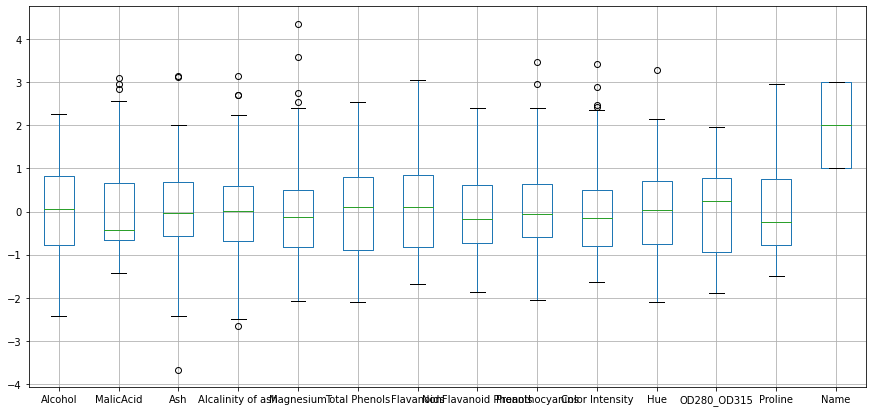

In [14]:
# gera um bloxplot para cada atributo
df_dataset.boxplot(figsize=(15,7))
plt.show()

O box plot está indicando a presença de alguns atributos que possuem *outliers*, o que pode prejudicar o desempenho de vários métodos de aprendizado de máquina, pois tratam-se de amostras com valores de atributos incorretos. 

Outra forma de analisar se a base de dados contém *outliers* é usar gráficos de dispersão. Pode-se plotar gráficos de dispersão de todas as combinações de atributos da base de dados usando a função `scatter_matrix` da `Pandas`.

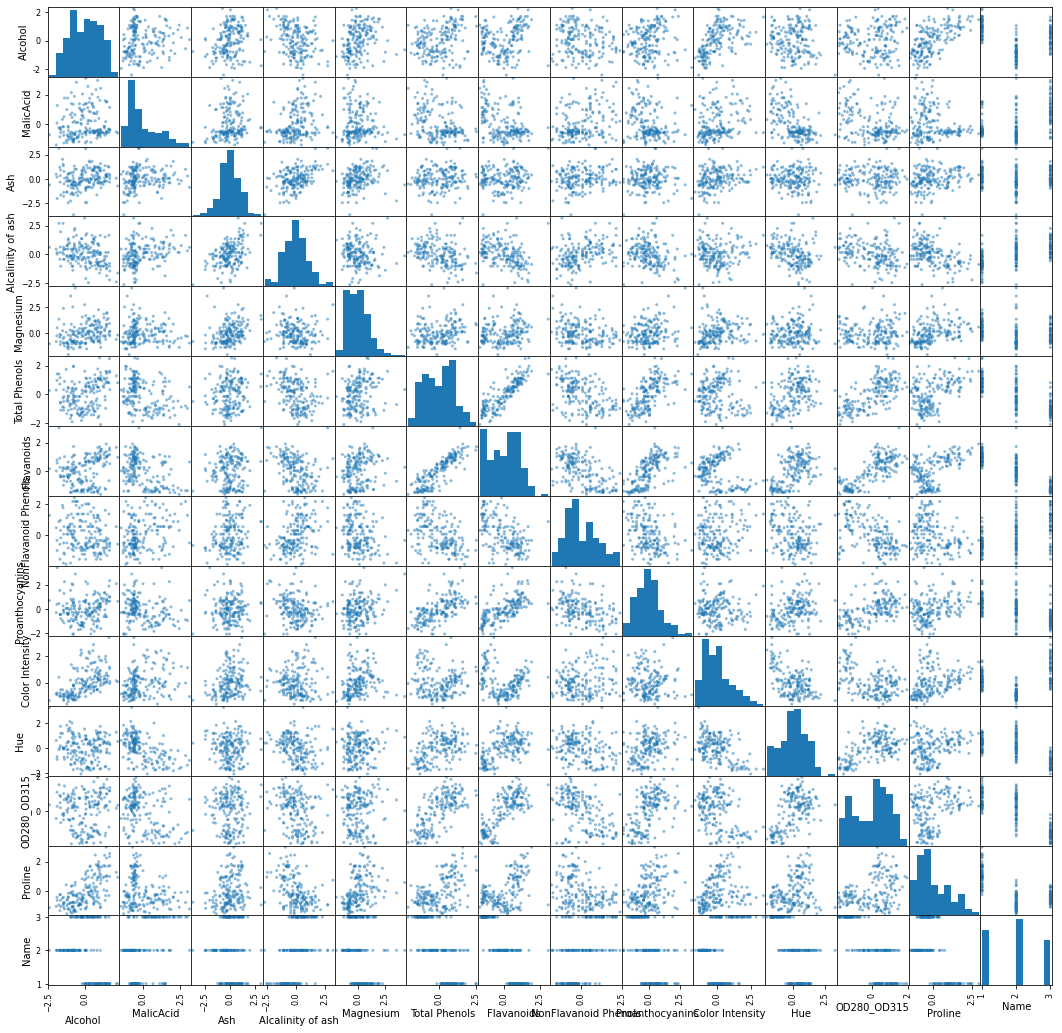

In [15]:
pd.plotting.scatter_matrix(df_dataset, figsize=(18,18))

plt.show()

Outra forma de plotar gráficos de dispersão a partir dos _dataframes_ é usando a biblioteca `Seaborn`. Juntamente com essa biblioteca, também é recomendável importar a biblioteca `Matplotlib` para personalizar os gráficos. 

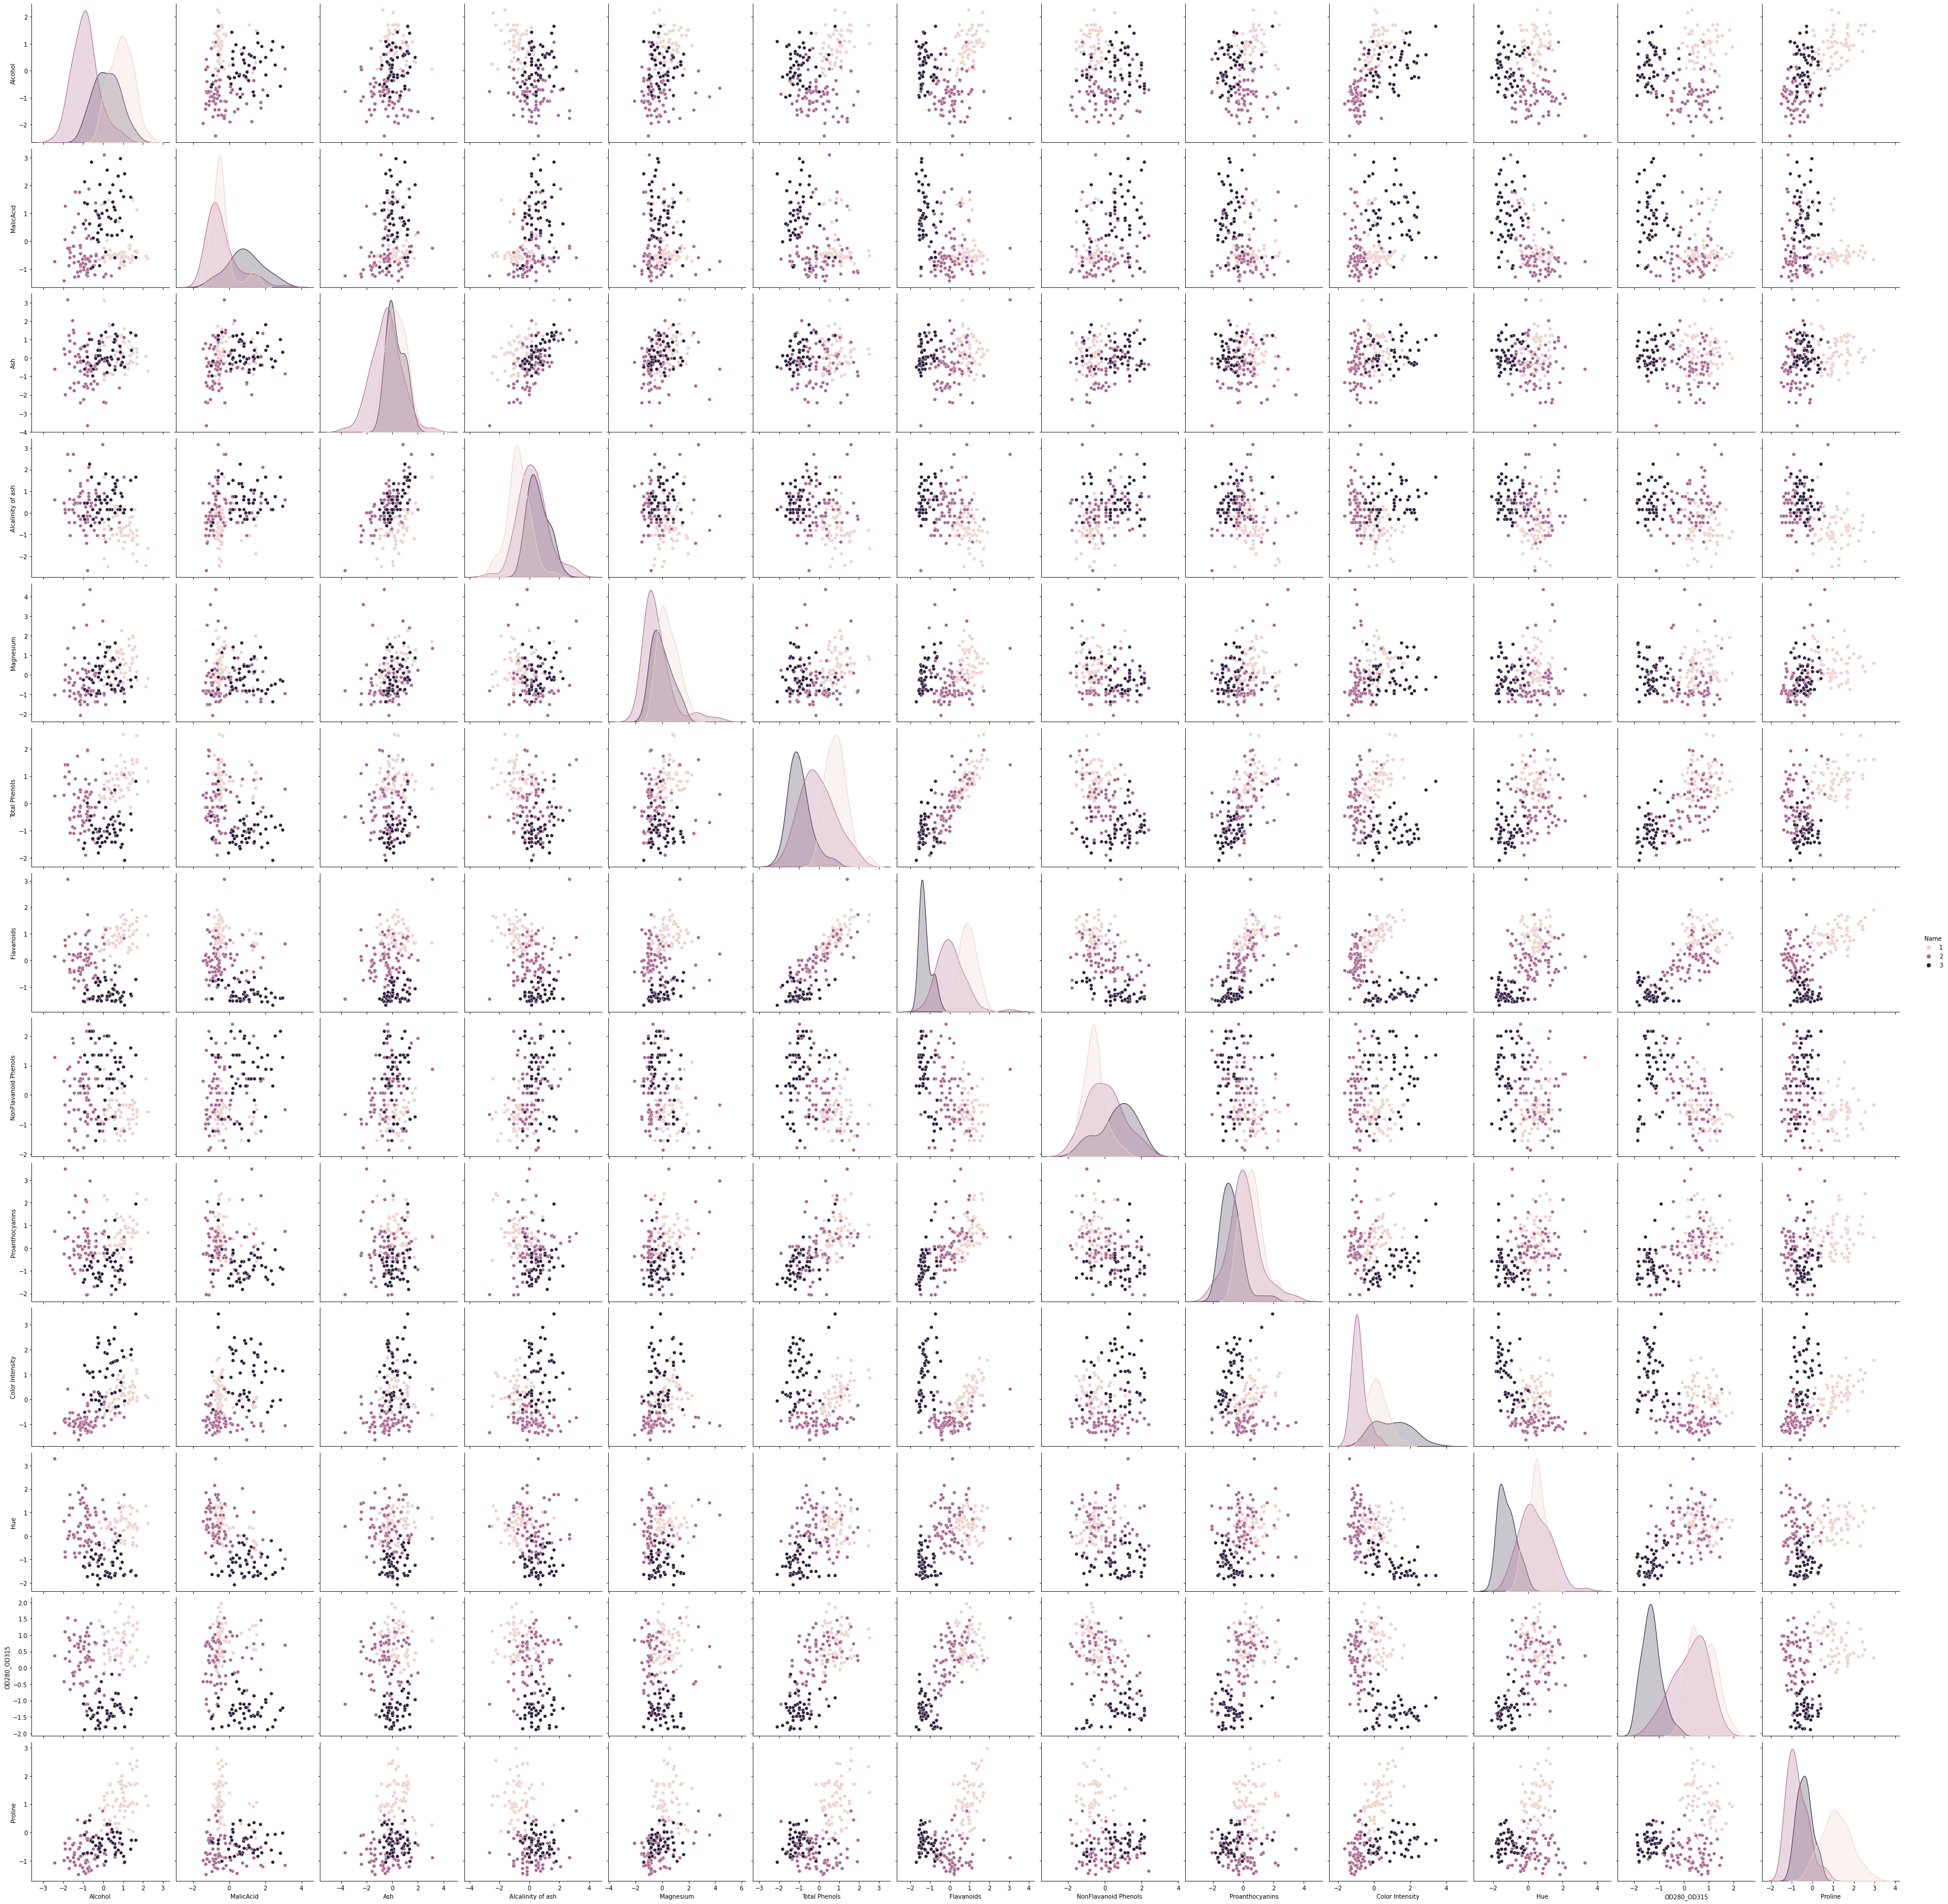

In [16]:
# matriz de gráficos scatter 
#hue='classe'
sns.pairplot(df_dataset, hue='Name', height=3.5);

# mostra o gráfico usando a função show() da matplotlib
plt.show()


Pelos gráficos, os *outliers* parecem ser mais visíveis na combinação dos atributos `Color Intensity` e `Magnesium`. Então, vamos usar a função `lmplot` da biblioteca `Seaborn`para visualizar a combinação desses dois atributos.

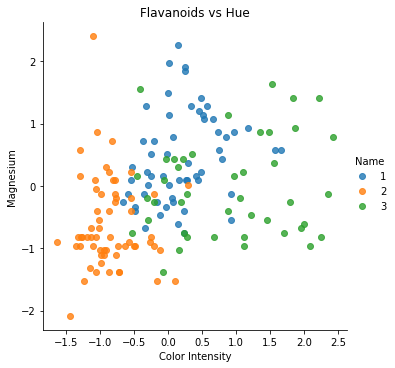

In [32]:
# define o scatter plot
sns.lmplot(x='Color Intensity', y='Magnesium', data=df_dataset, 
           #Alcalinity of ash	Magnesium
           fit_reg=False,  
           hue='Name')

# cria um título para o gráfico
plt.title('Flavanoids vs Hue')

# mostra o gráfico
plt.show()

Pelos gráficos vistos até o momento, fica claro que um dos *outliers* possui um alto valor no atributo `Color Intensity`. Já o segundo outlier contém um alto valor no atributo `Magnesium`. 

A bilioteca `Seaborn` permite criar gráficos boxplot agrupados por um determinado atributo, o que facilita a análise dos dados. No exemplo abaixo, criaremos boxplots para cada atributo agrupados pela classe.

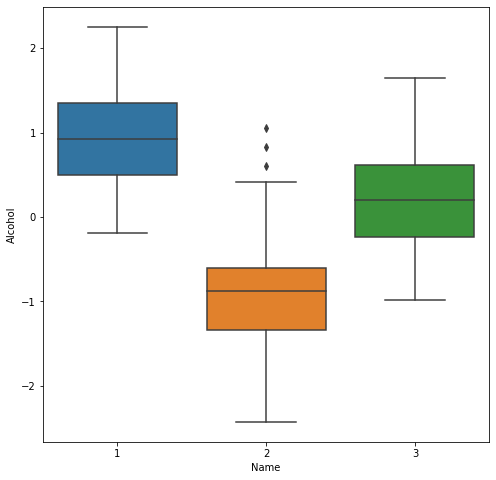

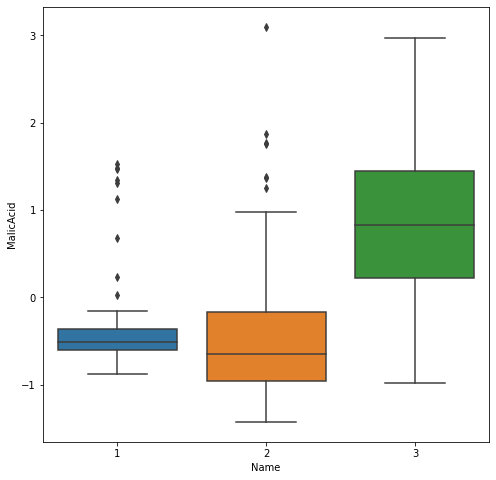

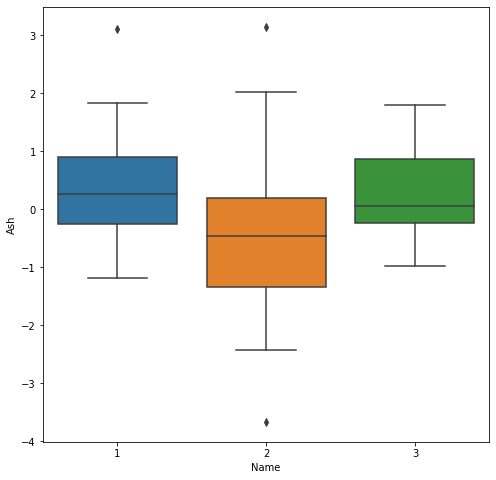

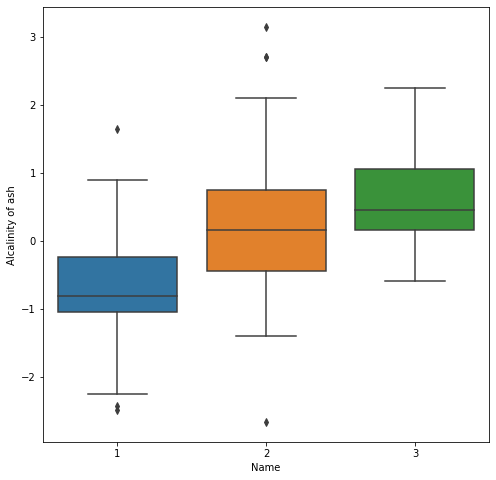

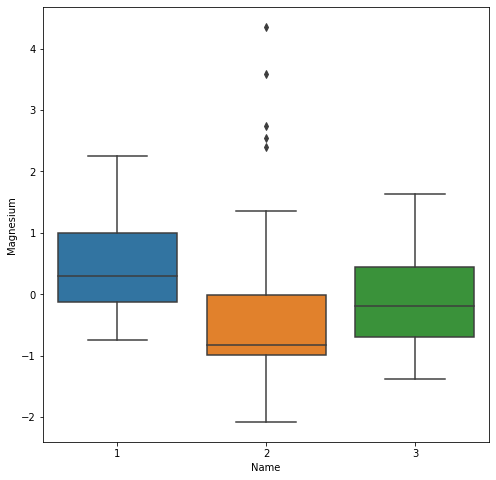

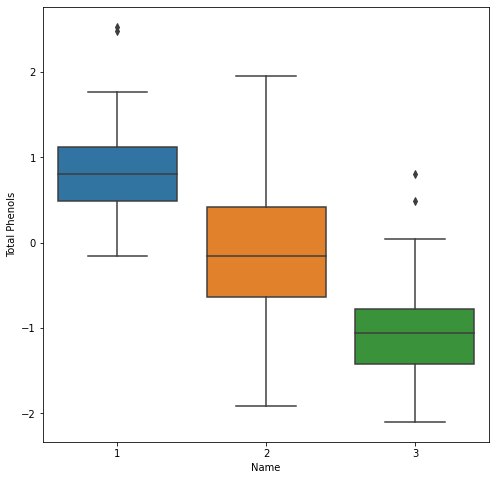

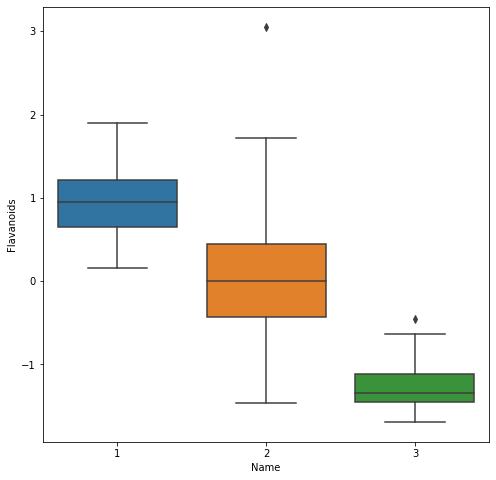

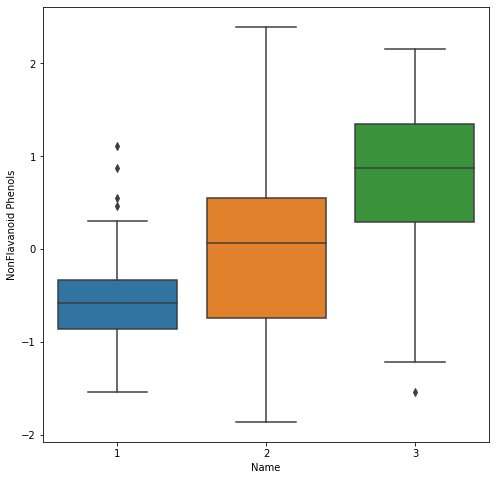

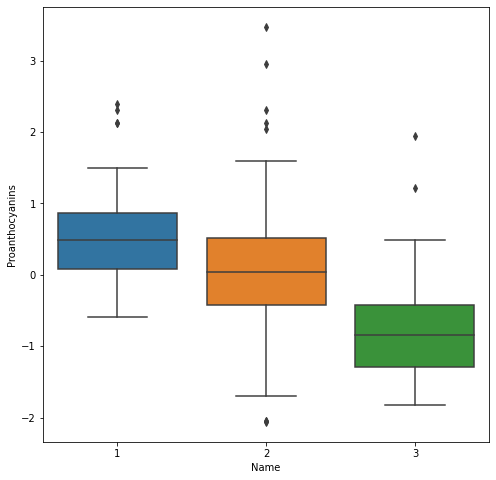

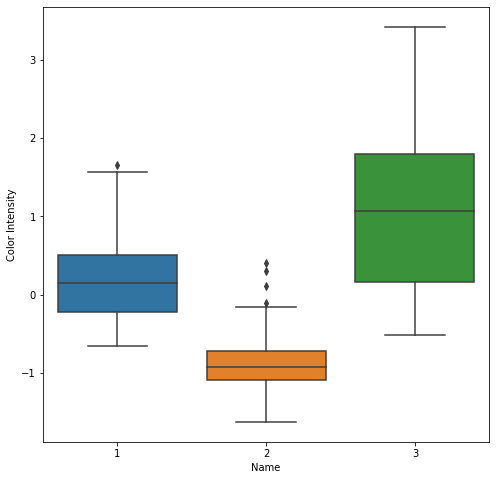

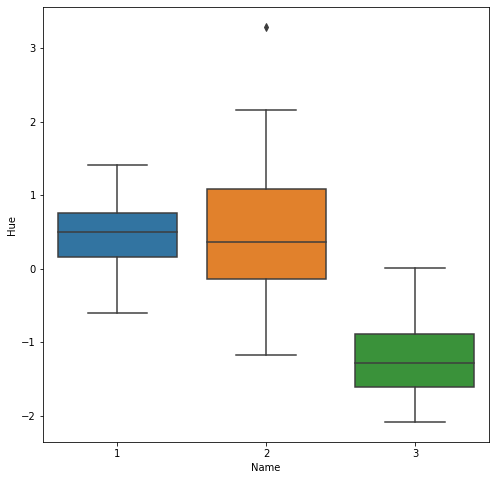

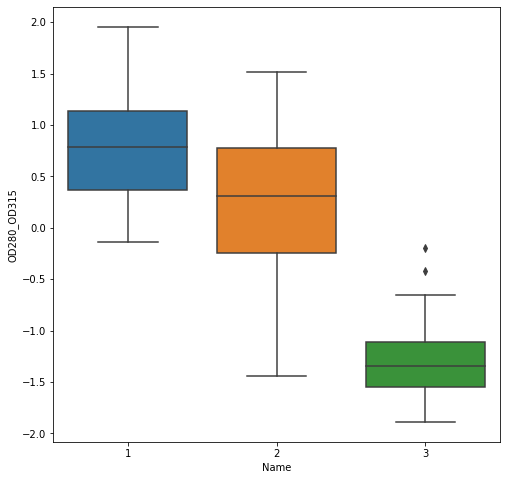

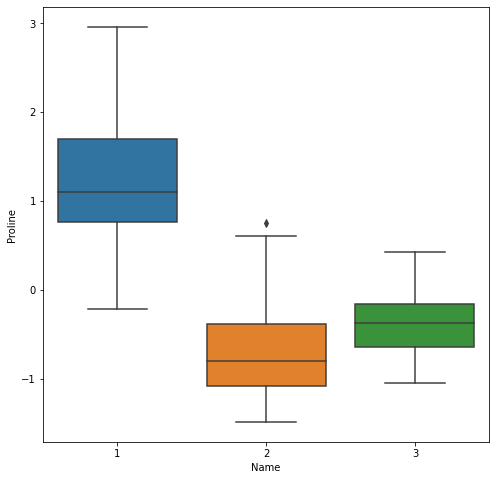

In [18]:
for atributo in df_dataset.columns[:-1]:
    # define a dimensão do gráfico
    plt.figure(figsize=(8,8))

    # cria o boxplot
    sns.boxplot(x="Name", y=atributo, data=df_dataset, whis=1.5)

    # mostra o gráfico
    plt.show()

Os box plots dos atributos mostraram outros *outliers* que não haviam aparecido no primeiro box plot. Portanto, esses novos valores são considerados *outliers* se analisarmos as classes individualmente, mas não são considerados *outliers* se analisarmos a base de dados de forma geral. 

Outro tipo de gráfico que ajuda a detectar *outliers* é o histograma. Portanto, será usado para analisar cada atributo.

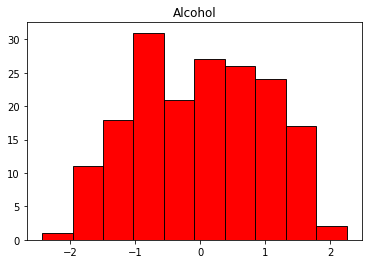

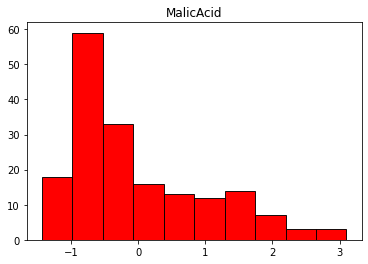

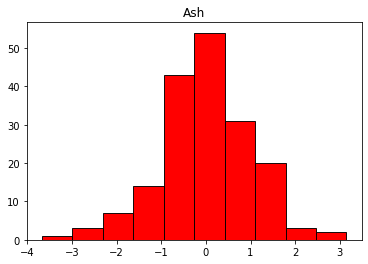

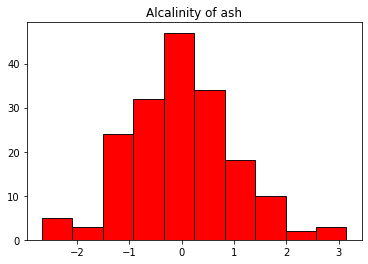

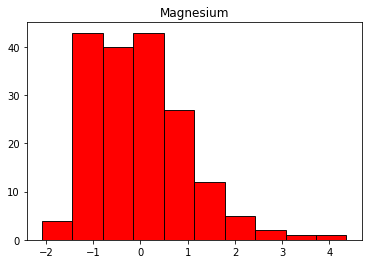

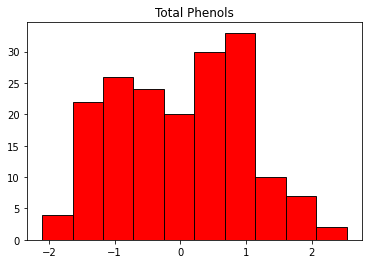

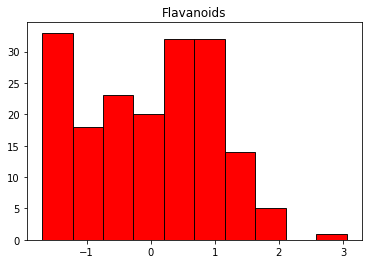

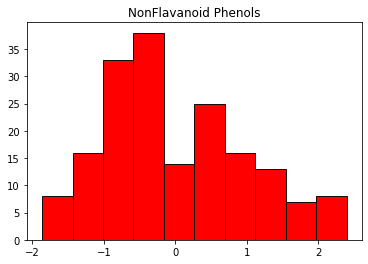

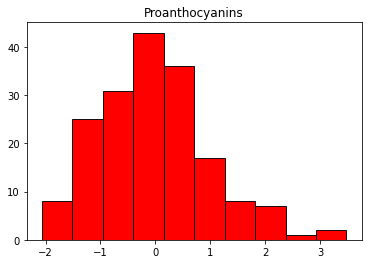

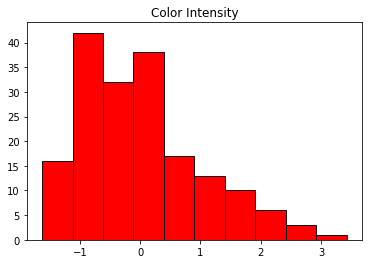

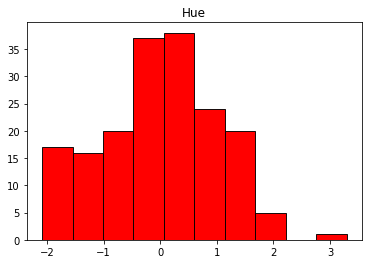

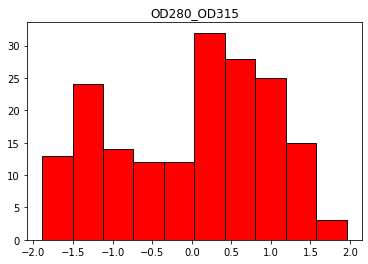

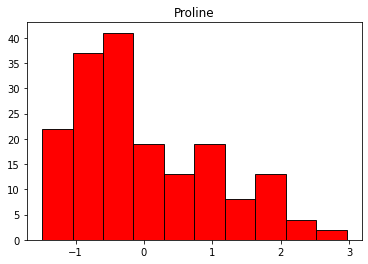

In [19]:
for atributo in df_dataset.columns[:-1]:
    
    # cria o histograma
    n, bins, patches = plt.hist(df_dataset[atributo].values,bins=10, color='red', edgecolor='black', linewidth=0.9)

    # cria um título para o gráfico
    plt.title(atributo)

    # mostra o gráfico
    plt.show()

Agora, pode-se usar um gráfico de densidade para fazer o mesmo tipo de análise.

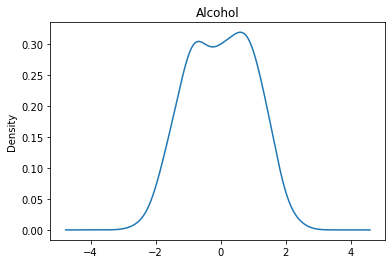

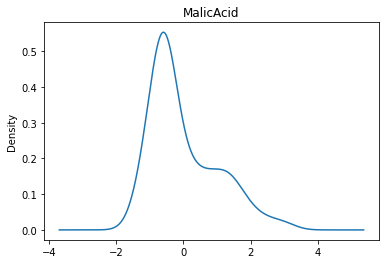

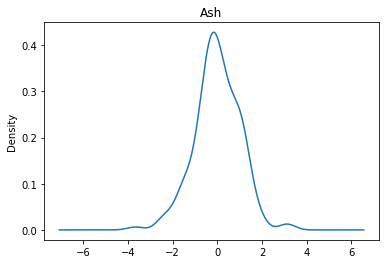

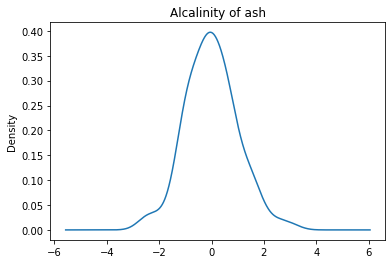

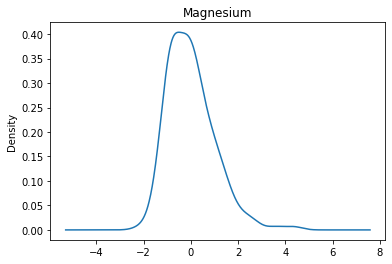

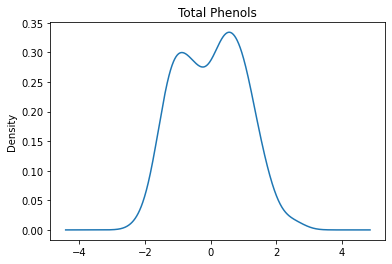

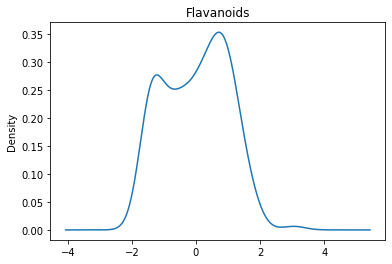

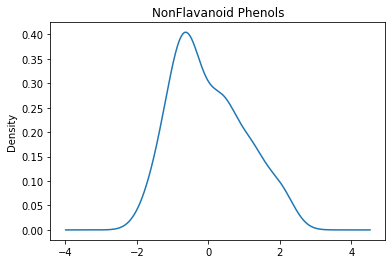

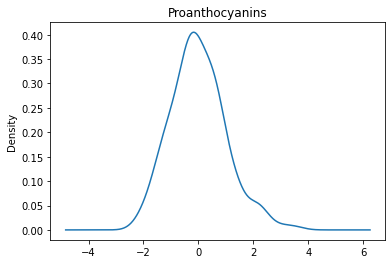

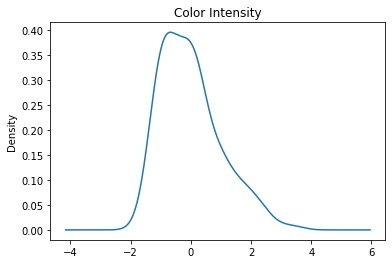

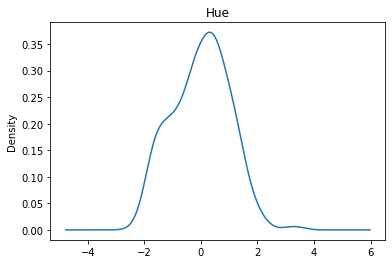

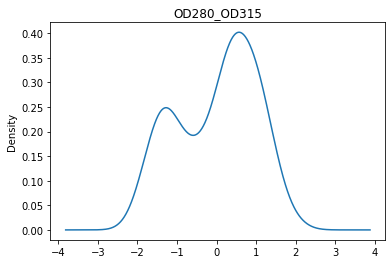

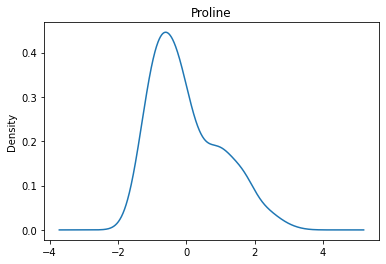

In [20]:
for atributo in df_dataset.columns[:-1]:

    # criando o gráfico de densidade para cada atributo
    densityplot = df_dataset[atributo].plot(kind='density')
    
    # cria um título para o gráfico
    plt.title(atributo)

    # mostra o gráfico
    plt.show()

Uma das maneiras mais simples de tratar *outliers* é remover aqueles valores que são menores que $Q1 - 1.5 * IQR$ ou maiores que $Q3 + 1.5 * IQR$, onde $Q1$ é o primeiro quartil, $Q3$ é o terceiro quartil e $IQR$ é o intervalo interquartil. O IQR pode ser calculado pela seguinte equação: $IQR = Q3-Q1$. 

Com base nessas informações, vamos usar a função abaixo para remover os *outliers* da base de dados. Usaremos como base o IQR de cada atributo em relação a todos os valores na base de dados, em vez do IQR individual de cada classe.

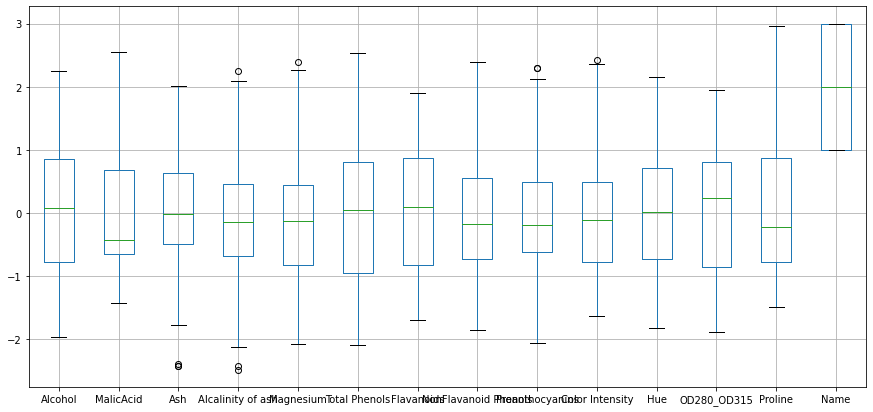

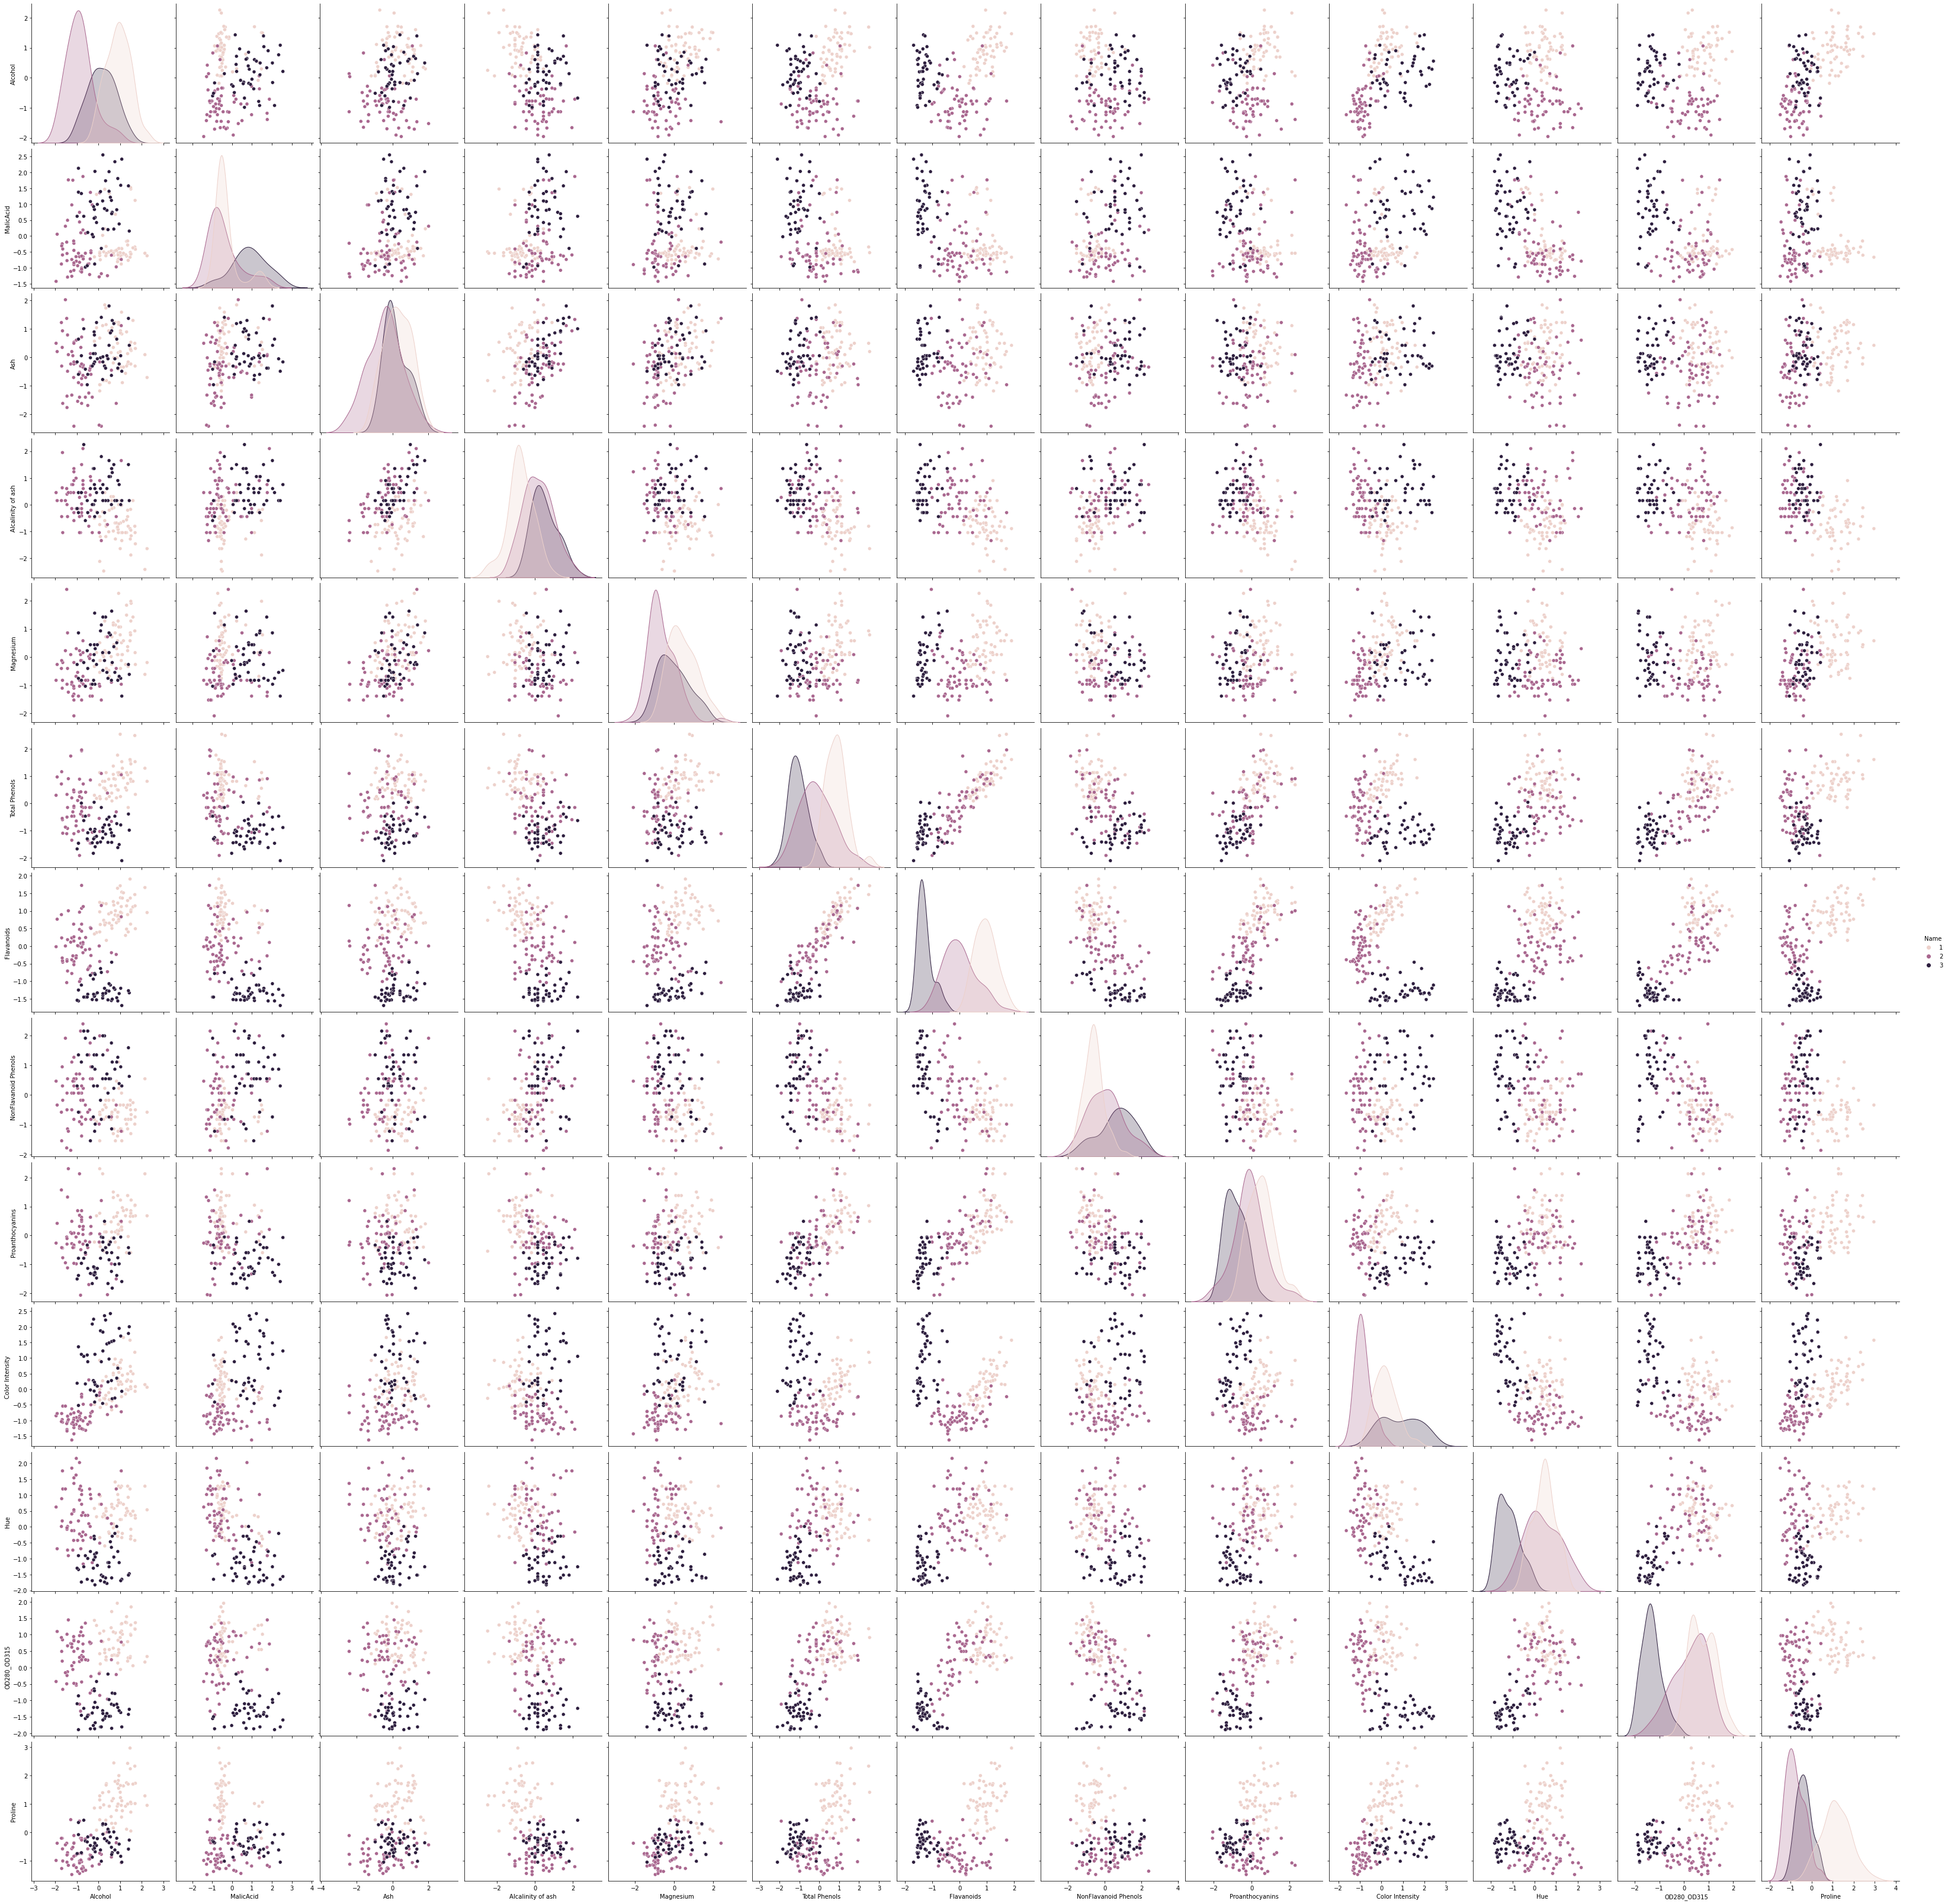

In [21]:
def removeOutliers(df_dataset):
    """
    Remove os outliers da base de dados 
    """
    
    for atributo in df_dataset.columns[:-1]:

        # obtem o terceiro e o primeiro quartil. 
        q75, q25 = np.percentile(df_dataset[atributo].values, [75 ,25])
        
        # calcula o IQR
        IQR = q75 - q25

        # remove os outliers com base no valor do IQR
        df_dataset = df_dataset[ (df_dataset[atributo]<=(q75+1.5*IQR)) & (df_dataset[atributo]>=(q25-1.5*IQR)) ]
    
    return df_dataset

# remove os outliers
df_dataset = removeOutliers( df_dataset )

# apresenta as principais estatísticas sobre a base de dados
df_dataset.boxplot(figsize=(15,7))
plt.show()

# matriz de gráficos scatter 
sns.pairplot(df_dataset, hue='Name', height=3.5);

# mostra o gráfico usando a função show() da matplotlib
plt.show()

Depois da remoção, o box plot e os gráficos de dispersão indicam que não há mais nenhum *outlier* na base de dados. 

Com os novos gráficos de dispersão, também é possível perceber que no atributo *Flavanoids* e *Alcohol é  mais fácil de identificar as classes, pois está mais separada no espaço de atributos. Por outro lado, em várias combinações de atributos, as classes **1**, **2** e **3** se misturam.

**IMPORTANTE:** antes de realizar a remoção de *outliers*, é mandatório analisar cuidadosamente as características das amostras antes de removê-las. Em alguns casos, remover os *outliers* pode ser prejudicial. Além disso, algumas tarefas de aprendizado de máquina são voltadas para a detecção de *outliers* e, portanto, esses dados não podem ser removidos. Adicionalmente, se a base de dados for desbalanceada, a remoção dos *outliers* com base nas estatísticas de toda a base, pode acabar removendo amostras da classe minoritária (aquela que possui menos amostras). Ainda, alguns métodos de classificação, tais como métodos baseados em *ensemble* e métodos baseados em árvores, costumam ser robustos a *outliers*. Diante disso, em alguns problemas, é recomendável remover apenas aqueles *outliers* que são claramente erros de leitura/digitação, isto é, valores que estão fora dos limites aceitáveis para o que é esperado para um determinado atributo (por exemplo, uma pessoa com 500 anos ou um bebê com 300 kg). 

## Pré-processamento: distribuição das classes

Outro passo importante na análise de dados é verificar a distribuição das classes. Para isso, é possível criar um gráfico de barra indicando quantas amostras de cada classe há na base de dados.

2    61
1    57
3    43
Name: Name, dtype: int64

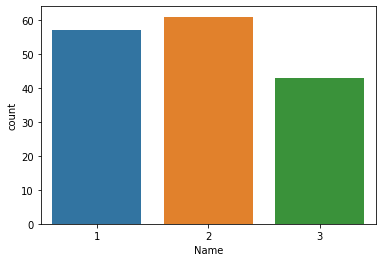

In [22]:
display( df_dataset['Name'].value_counts() )

# cria um gráfico de barras com a frequência de cada classe
sns.countplot(x="Name", data=df_dataset)

# mostra o gráfico
plt.show()

Pode-se ver que as classes são balanceadas. Se o número de exemplos em alguma das classes fosse muito superior às demais, seria necessário que usar alguma técnica de balanceamento de classes, pois o modelo gerado pela maioira dos métodos de aprendizado supervisionado costuma ser tendencioso para as classes com maior número de amostras. 

## Pré-processamento: correlação entre os atributos

Quando dois atributos possuem valores idênticos ou muito semelhantes para todas as amostras, um deles deve ser eliminado ou eles devem ser combinados. Isso ajuda a diminuir o custo computacional das tarefas de aprendizado e evita que o aprendizado de alguns método seja prejudicado, principalmente os métodos baseados em otimização.

Uma das maneiras mais comuns de analisar a correlação dos dados é através das matrizes de correlação e covariância. Pode-se fazer isso usando a biblioteca `Numpy` ou a `Pandas`.

Primeiro, será usatilizada a `Numpy`.

In [23]:
# criando uma matriz X com os valores do data frame
X = df_dataset.iloc[:,:-1].values

# matriz de covariancia
covariance = np.cov(X, rowvar=False)

# matriz de correlação
correlation = np.corrcoef(X, rowvar=False)

print('Matriz de covariância: ')
display(covariance)

print('\n\nMatriz de correlação: ')
display(correlation)

Matriz de covariância: 


array([[ 0.95036344,  0.08884609,  0.19371747, -0.2938274 ,  0.35655946,
         0.31899444,  0.28980299, -0.16725499,  0.18857117,  0.49017135,
        -0.00971615,  0.10629422,  0.64190173],
       [ 0.08884609,  0.88914256,  0.15276066,  0.26118726,  0.02468218,
        -0.35010833, -0.42642471,  0.27656793, -0.20485497,  0.26665815,
        -0.52232061, -0.3785432 , -0.17328626],
       [ 0.19371747,  0.15276066,  0.77760675,  0.25184843,  0.32244012,
         0.09397556,  0.03801417,  0.07819044,  0.02457565,  0.17286015,
        -0.03619984, -0.02914825,  0.24193337],
       [-0.2938274 ,  0.26118726,  0.25184843,  0.79313288, -0.13679493,
        -0.40548904, -0.44402033,  0.296742  , -0.24630747, -0.02626027,
        -0.26970742, -0.3361816 , -0.42462225],
       [ 0.35655946,  0.02468218,  0.32244012, -0.13679493,  0.75392863,
         0.20894289,  0.16993203, -0.20044128,  0.07764653,  0.28002281,
        -0.01787852,  0.01867636,  0.39398829],
       [ 0.31899444, -0.350108



Matriz de correlação: 


array([[ 1.        ,  0.09665131,  0.22534291, -0.33843436,  0.42123261,
         0.3255994 ,  0.30255675, -0.17527505,  0.21546287,  0.54085531,
        -0.01047995,  0.10851222,  0.65242484],
       [ 0.09665131,  1.        ,  0.1837155 ,  0.31102358,  0.03014621,
        -0.36945547, -0.46026241,  0.29964151, -0.24199301,  0.30419159,
        -0.58245351, -0.39952469, -0.18208964],
       [ 0.22534291,  0.1837155 ,  1.        ,  0.32069062,  0.42111814,
         0.10604258,  0.04387472,  0.09058567,  0.03104324,  0.21085937,
        -0.04316547, -0.03289624,  0.27184576],
       [-0.33843436,  0.31102358,  0.32069062,  1.        , -0.17690165,
        -0.45305559, -0.50743301,  0.34040184, -0.30806803, -0.03171789,
        -0.31844154, -0.3756772 , -0.47242903],
       [ 0.42123261,  0.03014621,  0.42111814, -0.17690165,  1.        ,
         0.23944613,  0.19918608, -0.23583481,  0.09960909,  0.34690162,
        -0.02165092,  0.02140627,  0.44959865],
       [ 0.3255994 , -0.369455

Agora, serão calculadas as matrizes de correlação e covariância usando a `Pandas`.

In [24]:
# matriz de covariancia
df_covariance = df_dataset.cov()

# matriz de correlação
df_correlation = df_dataset.corr()

print('Matriz de covariância: ')
display(df_covariance)

print('\n\nMatriz de correlação: ')
display(df_correlation)

Matriz de covariância: 


Alcohol  MalicAcid       Ash  Alcalinity of ash  \
Alcohol               0.950363   0.088846  0.193717          -0.293827   
MalicAcid             0.088846   0.889143  0.152761           0.261187   
Ash                   0.193717   0.152761  0.777607           0.251848   
Alcalinity of ash    -0.293827   0.261187  0.251848           0.793133   
Magnesium             0.356559   0.024682  0.322440          -0.136795   
Total Phenols         0.318994  -0.350108  0.093976          -0.405489   
Flavanoids            0.289803  -0.426425  0.038014          -0.444020   
NonFlavanoid Phenols -0.167255   0.276568  0.078190           0.296742   
Proanthocyanins       0.188571  -0.204855  0.024576          -0.246307   
Color Intensity       0.490171   0.266658  0.172860          -0.026260   
Hue                  -0.009716  -0.522321 -0.036200          -0.269707   
OD280_OD315           0.106294  -0.378543 -0.029148          -0.336182   
Proline               0.641902  -0.173286  0.241933          -0.424622   
Name                 -0.280969   0.338948 -0.047950           0.402389   

                      Magnesium  Total Phenols  Flavanoids  \
Alcohol                0.356559       0.318994    0.289803   
MalicAcid              0.024682      -0.350108   -0.426425   
Ash                    0.322440       0.093976    0.038014   
Alcalinity of ash     -0.136795      -0.405489   -0.444020   
Magnesium              0.753929       0.208943    0.169932   
Total Phenols          0.208943       1.009972    0.871526   
Flavanoids             0.169932       0.871526    0.965389   
NonFlavanoid Phenols  -0.200441      -0.489423   -0.575008   
Proanthocyanins        0.077647       0.579244    0.650845   
Color Intensity        0.280023      -0.061562   -0.156273   
Hue                   -0.017879       0.450678    0.550993   
OD280_OD315            0.018676       0.713303    0.774750   
Proline                0.393988       0.522775    0.519941   
Name                  -0.170987      -0.594030   -0.680361   

                      NonFlavanoid Phenols  Proanthocyanins  Color Intensity  \
Alcohol                          -0.167255         0.188571         0.490171   
MalicAcid                         0.276568        -0.204855         0.266658   
Ash                               0.078190         0.024576         0.172860   
Alcalinity of ash                 0.296742        -0.246307        -0.026260   
Magnesium                        -0.200441         0.077647         0.280023   
Total Phenols                    -0.489423         0.579244        -0.061562   
Flavanoids                       -0.575008         0.650845        -0.156273   
NonFlavanoid Phenols              0.958138        -0.378525         0.100397   
Proanthocyanins                  -0.378525         0.805965        -0.034771   
Color Intensity                   0.100397        -0.034771         0.864259   
Hue                              -0.260210         0.295151        -0.428709   
OD280_OD315                      -0.517249         0.528472        -0.397720   
Proline                          -0.306744         0.332678         0.338520   
Name                              0.387499        -0.422346         0.167567   

                           Hue  OD280_OD315   Proline      Name  
Alcohol              -0.009716     0.106294  0.641902 -0.280969  
MalicAcid            -0.522321    -0.378543 -0.173286  0.338948  
Ash                  -0.036200    -0.029148  0.241933 -0.047950  
Alcalinity of ash    -0.269707    -0.336182 -0.424622  0.402389  
Magnesium            -0.017879     0.018676  0.393988 -0.170987  
Total Phenols         0.450678     0.713303  0.522775 -0.594030  
Flavanoids            0.550993     0.774750  0.519941 -0.680361  
NonFlavanoid Phenols -0.260210    -0.517249 -0.306744  0.387499  
Proanthocyanins       0.295151     0.528472  0.332678 -0.422346  
Color Intensity      -0.428709    -0.397720  0.338520  0.167567  
Hue                   0.904441     0.545089  0.225258 



Matriz de correlação: 


Alcohol  MalicAcid       Ash  Alcalinity of ash  \
Alcohol               1.000000   0.096651  0.225343          -0.338434   
MalicAcid             0.096651   1.000000  0.183716           0.311024   
Ash                   0.225343   0.183716  1.000000           0.320691   
Alcalinity of ash    -0.338434   0.311024  0.320691           1.000000   
Magnesium             0.421233   0.030146  0.421118          -0.176902   
Total Phenols         0.325599  -0.369455  0.106043          -0.453056   
Flavanoids            0.302557  -0.460262  0.043875          -0.507433   
NonFlavanoid Phenols -0.175275   0.299642  0.090586           0.340402   
Proanthocyanins       0.215463  -0.241993  0.031043          -0.308068   
Color Intensity       0.540855   0.304192  0.210859          -0.031718   
Hue                  -0.010480  -0.582454 -0.043165          -0.318442   
OD280_OD315           0.108512  -0.399525 -0.032896          -0.375677   
Proline               0.652425  -0.182090  0.271846          -0.472429   
Name                 -0.366803   0.457475 -0.069204           0.575033   

                      Magnesium  Total Phenols  Flavanoids  \
Alcohol                0.421233       0.325599    0.302557   
MalicAcid              0.030146      -0.369455   -0.460262   
Ash                    0.421118       0.106043    0.043875   
Alcalinity of ash     -0.176902      -0.453056   -0.507433   
Magnesium              1.000000       0.239446    0.199186   
Total Phenols          0.239446       1.000000    0.882622   
Flavanoids             0.199186       0.882622    1.000000   
NonFlavanoid Phenols  -0.235835      -0.497526   -0.597872   
Proanthocyanins        0.099609       0.642021    0.737851   
Color Intensity        0.346902      -0.065892   -0.171084   
Hue                   -0.021651       0.471543    0.589664   
OD280_OD315            0.021406       0.706372    0.784737   
Proline                0.449599       0.515427    0.524336   
Name                  -0.250621      -0.752270   -0.881268   

                      NonFlavanoid Phenols  Proanthocyanins  Color Intensity  \
Alcohol                          -0.175275         0.215463         0.540855   
MalicAcid                         0.299642        -0.241993         0.304192   
Ash                               0.090586         0.031043         0.210859   
Alcalinity of ash                 0.340402        -0.308068        -0.031718   
Magnesium                        -0.235835         0.099609         0.346902   
Total Phenols                    -0.497526         0.642021        -0.065892   
Flavanoids                       -0.597872         0.737851        -0.171084   
NonFlavanoid Phenols              1.000000        -0.430748         0.110328   
Proanthocyanins                  -0.430748         1.000000        -0.041662   
Color Intensity                   0.110328        -0.041662         1.000000   
Hue                              -0.279525         0.345698        -0.484898   
OD280_OD315                      -0.525896         0.585839        -0.425764   
Proline                          -0.310505         0.367174         0.360802   
Name                              0.503821        -0.598729         0.229396   

                           Hue  OD280_OD315   Proline      Name  
Alcohol              -0.010480     0.108512  0.652425 -0.366803  
MalicAcid            -0.582454    -0.399525 -0.182090  0.457475  
Ash                  -0.043165    -0.032896  0.271846 -0.069204  
Alcalinity of ash    -0.318442    -0.375677 -0.472429  0.575033  
Magnesium            -0.021651     0.021406  0.449599 -0.250621  
Total Phenols         0.471543     0.706372  0.515427 -0.752270  
Flavanoids            0.589664     0.784737  0.524336 -0.881268  
NonFlavanoid Phenols -0.279525    -0.525896 -0.310505  0.503821  
Proanthocyanins       0.345698     0.585839  0.367174 -0.598729  
Color Intensity      -0.484898    -0.425764  0.360802  0.229396  
Hue                   1.000000     0.570415  0.234691 

Pode-se ver que os atributos `Total Phenols` e `Flavanoids` possuem alta covariância e alta correlação. Se o problema em questão tivesse muitos atributos, podería-se pensar na possibilidade de combinar esses dois atributos. Se a correlação entre dois atributos for igual a 1 ou -1, significa que eles são redundantes e um deles poderia ser eliminado.

Para facilitar a visualização, será plotada a matriz de covariância e a de correlação usando mapas de cores.

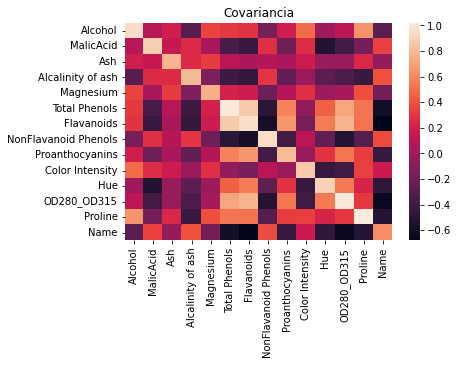

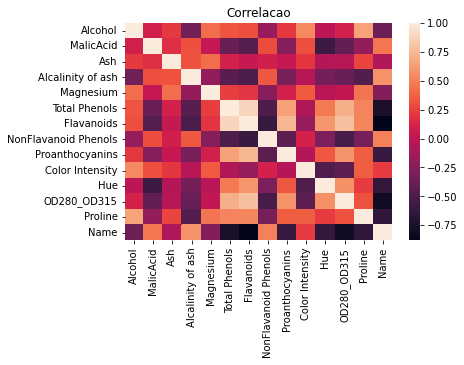

In [25]:
# cria um mapa de cores dos valores da covariancia
sns.heatmap(df_covariance, 
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

plt.title('Covariancia')
plt.show()

# cria um mapa de cores dos valores da correlação
sns.heatmap(df_correlation, 
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

plt.title('Correlacao')
plt.show()

k-Nearest Neighbors (KNN), esse algorritimo tenta classificar cada amostra de um conjunto de dados avaliando sua distância em relação aos vizinhos mais próximos. Se os vizinhos mais próximos forem majoritariamente de uma classe, a amostra em questão será classificada nesta categoria, como classe nesse banco de dados temos o `Name`. Como atributos descritivos temos: `Alcohol`, `MalicAcid`,	`Ash`,	`Alcalinity of ash`,	`Magnesium`,	`Total Phenols`,	`Flavanoids`,	`NonFlavanoid Phenols`,	`Proanthocyanins`,	`Color Intensity`,	`Hue`,	`OD280_OD315`,	`Proline`.

Acuracia: 0.9795918367346939
              precision    recall  f1-score   support

           1       0.94      1.00      0.97        16
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        14

    accuracy                           0.98        49
   macro avg       0.98      0.98      0.98        49
weighted avg       0.98      0.98      0.98        49

Matriz de confusão
[[16  0  0]
 [ 1 18  0]
 [ 0  0 14]]


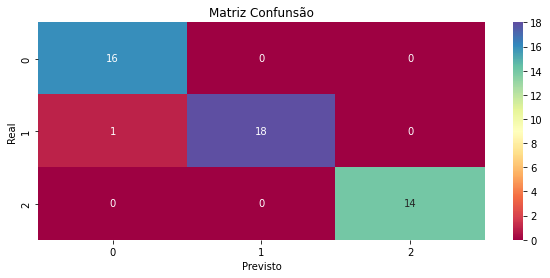

In [26]:
# Definindo as colunas como atributos descritivos
X = df_dataset.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]].values
# Definindo a coluna 13 como atributo Classe (Name)
y = df_dataset.iloc[:, 13].values

# Separando o conjunto de dados em conjunto de treinamento e deteste sendo 70% treinamento 30% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
# Gerando o Classificador com os dados de treinamento
classifier = KNeighborsClassifier(n_neighbors = 17)
classifier.fit(X_train, y_train)

# Realizando a Predição das Classes dos dados do conjunto de teste 
y_pred = classifier.predict(X_test)

# Gerando a Matriz de Confusão com os dados de teste
cm = confusion_matrix(y_test, y_pred)
# Precissão do modelo de acuriacia
print("Acuracia:",metrics.accuracy_score(y_test, y_pred))

# Vizualização dos Resultados sobre o Conjunto de Treinamento
print(classification_report(y_test,y_pred))

#vizualizando matriz de confusão
print("Matriz de confusão")
print(cm)
#criando matriz de confusão
fig, (ax1) = plt.subplots(1, figsize=(10,4))
 
sns.heatmap(cm, annot=True, fmt="d",  cmap="Spectral")
 
ax1.set_title("Matriz Confunsão")

 
axs = [ax1]
 
for ax in axs:
    ax.set(xlabel='Previsto', ylabel='Real')
plt.show()

#hitmap da matriz de acuracia
# '''Uso da biblioteca Matplotlib
#X_set, y_set = X_train, y_train
#X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
#                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
#plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#             alpha = 0.75, cmap = ListedColormap(('cyan', 'gray')))
#plt.xlim(X1.min(), X1.max())
#plt.ylim(X2.min(), X2.max())
#for i, j in enumerate(np.unique(y_set)):
#    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
#                c = ListedColormap(('red', 'green'))(i), label = j)
#plt.title('Classificador KNN (Dados Treinamento)')
#plt.xlabel('Idade')
#plt.ylabel('Salário')
#plt.legend()
#plt.show()'''

Agora será utilizado um algoritimo para encontrar a melhor correspondencia de K e assim obter a melhor Acuracia.
Ele testa valores até obter a melhor correspondencia.

Melhor acuracia encontrada 1.0 Melhor ocorrencia de K 17
              precision    recall  f1-score   support

           1       0.94      1.00      0.97        16
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        14

    accuracy                           0.98        49
   macro avg       0.98      0.98      0.98        49
weighted avg       0.98      0.98      0.98        49

Acuracia: 1.0
Atualizando:               precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        14

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



array([[16,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 14]])

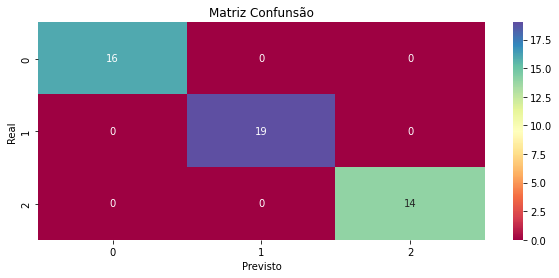

In [27]:
k = range(1,50,2)
testing_accuracy = []
training_accuracy = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    pipe_knn = Pipeline([('scale', MinMaxScaler()), ('knn', knn)])
    pipe_knn.fit(X_train, y_train)
    
    y_pred_train = pipe_knn.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    
    y_pred_test = pipe_knn.predict(X_test)
    acc_score = accuracy_score(y_test,y_pred_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i
        
print('Melhor acuracia encontrada', score, 'Melhor ocorrencia de K', best_k)
print(classification_report(y_test,y_pred))

# Definindo as colunas como atributos descritivos
X = df_dataset.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]].values
# Definindo a coluna 13 como atributo Classe (Name)
y = df_dataset.iloc[:, 13].values

# Separando o conjunto de dados em conjunto de treinamento e deteste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) #70% treinamento 30% teste
# Gerando o Classificador com os dados de treinamento
classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(X_train, y_train)

# Realizando a Predição das Classes dos dados do conjunto de teste 
y_pred = classifier.predict(X_test)

# Gerando a Matriz de Confusão com os dados de teste
cm = confusion_matrix(y_test, y_pred)
# Precissão do modelo de acuriacia
print("Acuracia:",metrics.accuracy_score(y_test, y_pred))

# Vizualização dos Resultados sobre o Conjunto de Treinamento
print('Atualizando:',classification_report(y_test,y_pred))

#vizualizando matriz de confusão
#print("Matriz de confusão")
#print(cm)
display(cm)
#criando matriz de confusão
fig, (ax1) = plt.subplots(1, figsize=(10,4))
 
sns.heatmap(cm, annot=True, fmt="d",  cmap="Spectral")
 
ax1.set_title("Matriz Confunsão")

 
axs = [ax1]
 
for ax in axs:
    ax.set(xlabel='Previsto', ylabel='Real')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

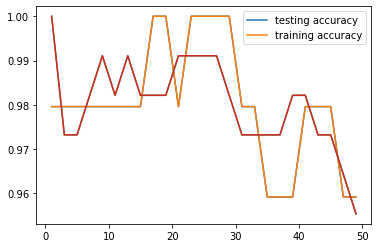

In [28]:
sns.lineplot(k, testing_accuracy)
sns.lineplot(k, testing_accuracy)

sns.lineplot(k, training_accuracy)
sns.lineplot(k, training_accuracy)
plt.legend(['testing accuracy', 'training accuracy'])


MLP Perceptron Multicamadas (PMC ou MLP — Multi Layer Perceptron) é uma rede neural com uma ou mais camadas ocultas com um número indeterminado de neurônios. 
MLP (Multi Layer Perceptron) – Modelo de aprendizado supervisionado onde foi fornecido uma amostra de dados informando a classificação dos mesmos, assim treinando o modelo para que quando uma nova amostra for recebida o mesmo seja capaz de estabelecer a que grupo uma amostra pertence. Usando os dados de 
treino o modelo alcançou uma taxa sempre superior a 90% de acurácia para o algoritmo de treinamento *`sgd`* para os dados de treino e teste com número de neurônios = 15. Assim, foi realizada a substituição para o algoritmo *`lbfgs`* ao qual foi obtido uma taxa de 100% (1) de acerto na classificação. Também foi observado que a quantidade de neurônios influência diretamente na precisão do modelo onde ao realiza testes com 1 neurônio o algoritmo com treino *`lbfgs`* teve uma taxa de acurácia inferior a 90% e com 2 neurônios 100%. Já o método de treino *`sgd`* mesmo com 10000 neurônios não conseguiu obter 100% de acurácia.



Resultado teino de acuracia: 1.0
Resultado teste de acuracia: 1.0


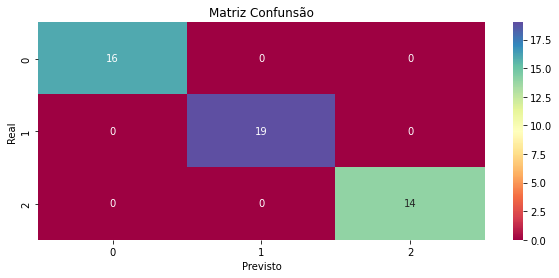

In [29]:
#organizando em entrada e saidas
x = df_dataset.iloc[:,0:12].values # Todos os dados da segunda ate a ultima coluna
y = df_dataset.iloc[:,13].values # Todos os dados da primeira coluna do dataset

#dividir em treinamento 70% para dos dados e 30% para testes
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.30, random_state= 0) #random_state é uma semente para gerar valores aleatorios

#Treinando o Modelo

neuronios = 2 #quanto menor o número do neoronios menor a acc(accuracy)
Ativacao = 'identity'
#sgd
algoTreinamento = 'lbfgs'
Aprendizado = 0.001 #representa aquantidade de saltos até chegar no objetivo (não é um valor exato)
resultado = MLPClassifier(hidden_layer_sizes=neuronios,  activation=Ativacao, solver=algoTreinamento, learning_rate_init=Aprendizado )

#Treinando
resultado.fit(X,y)
resultado.classes_
y_pred = resultado.predict(X_train)
acc = metrics.accuracy_score(y_train, y_pred)
print("Resultado teino de acuracia:",acc)
#Testando os dados


y_pred = resultado.predict(X_test)
print("Resultado teste de acuracia:",acc)

# Gerando a Matriz de Confusão com os dados de teste
cm = confusion_matrix(y_test, y_pred)

#vizualizando matriz de confusão
#print("Matriz de confusão")
#print(cm)

#criando matriz de confusão
fig, (ax1) = plt.subplots(1, figsize=(10,4))
 
sns.heatmap(cm, annot=True, fmt="d",  cmap="Spectral")
 
ax1.set_title("Matriz Confunsão")

 
axs = [ax1]
 
for ax in axs:
    ax.set(xlabel='Previsto', ylabel='Real')
plt.show()



---
## Conclusão

Foram mostradas as principais etapas de visualização, interpretação e pré-processamento dos dados. Foi apresentado como  eliminar atributos  irrelevantes e tratar dados faltantes, redundantes ou inconsistentes. Além disso, foi mostrado como deve ser feita a normalização dos dados e quais os possíveis impactos dessa etapa no desempenho dos métodos de aprendizado. Ainda, foi mostrada uma das técnicas de remoção de outliers, como visualizar a distribuição das classes e como analisar a correlação dos atributos.
Tambem foram apresentados os dados de acuracia para o algoritimo de KNN e o de MLP. No algoritimo KNN foi utilizado uma função para encontrar a melhor correspondencia de K, assim o valor da acuracia chegoa 1 (100%). Já no MLP, a primeiro momento foi utilizado o `sgd` como algoritimo de teinamento, e mesmo com uma alta quantidade de neuronios ele não obteve uma acuracia em 1 (100%); ao substituilo pelo algoritimo de treinamento `lbfgs`, com apenas 2 neuronios ele já obteve uma acuracia de 1 (100%). Assim, Tanto KNN quanto o MLP conseguiram obter a excelencia na classificação do banco de dados `wine.csv`.

---
## Referências

[1] R. A. Fisher. The use of multiple measurements in taxonomic problems. Annual Eugenics, 7, Part II, 179-188 (1936). DOI: [10.1111/j.1469-1809.1936.tb02137.x](http://dx.doi.org/10.1111/j.1469-1809.1936.tb02137.x).

[2] A. C. P. L. F. de Carvalho, et al. Inteligência Artificial - Uma Abordagem de Aprendizado de Máquina, 2a Edição, Rio de Janeiro, LTC, 2022.

Classificação de variedades de vinho. Kaggle, VANESSA ALINE 2019. Disponível em: <https://www.kaggle.com/code/vanessaaline/mlp-wine>. Acesso em: 22 de outubro. de 2022.

Entendendo a regressão e classicação knn do zero. Flavio Figueiredo, 2022. Disponível em: <https://icd-ufmg.github.io/20-knn/>. Acesso em: 22 de outubro. de 2022.

Previsão KNN para a qualidade do vinho tinto. Kaggle, ADITIANI, 2020. Disponível em: <https://www.kaggle.com/code/aditiani/knn-prediction-for-red-wine-quality>. Acesso em: 22 de outubro. de 2022.


Classificação KNN usando Scikit-Learn em Python. Codespeedy, Snigdha Ranjith. Disponível em: <https://www.kaggle.com/code/aditiani/knn-prediction-for-red-wine-quality>. Acesso em: 22 de outubro. de 2022.

Machine Learning: observe como a KNN funciona prevendo as variedades dos vinhos italianos. Codespeedy, Papa Moryba Kouate, 2020. Disponível em: <https://towardsdatascience.com/machine-learning-observe-how-knn-works-by-predicting-the-varieties-of-italian-wines-a64960bb2dae>. Acesso em: 22 de outubro. de 2022.
 
Tutorial de classificação KNN usando Scikit-learnKNN Classification Tutorial using Scikit-learn. Codespeedy, Avinash Navlani, 2018. Disponível em: <https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learnrdl>. Acesso em: 22 de outubro. de 2022.

---